In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
X, Y = make_classification(n_samples=9000, n_features=18, n_informative=4, n_redundant=12, random_state=4)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [3]:
train_score, test_score = list(), list()

In [4]:
values = [ i for i in range(1, 21)]
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [5]:
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, Y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(Y_train, train_yhat)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(Y_test, test_yhat)
    train_score.append(train_acc)
    test_score.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.841, test: 0.826
>2, train: 0.855, test: 0.844
>3, train: 0.878, test: 0.865
>4, train: 0.908, test: 0.889
>5, train: 0.919, test: 0.902
>6, train: 0.938, test: 0.913
>7, train: 0.952, test: 0.922
>8, train: 0.961, test: 0.928
>9, train: 0.969, test: 0.936
>10, train: 0.977, test: 0.936
>11, train: 0.983, test: 0.939
>12, train: 0.988, test: 0.935
>13, train: 0.992, test: 0.935
>14, train: 0.996, test: 0.933
>15, train: 0.998, test: 0.935
>16, train: 0.998, test: 0.937
>17, train: 0.999, test: 0.937
>18, train: 1.000, test: 0.933
>19, train: 1.000, test: 0.934
>20, train: 1.000, test: 0.934


In [6]:
plt.style.use('ggplot')

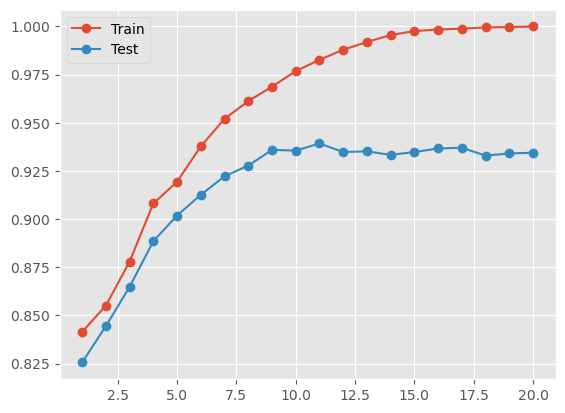

In [7]:
plt.plot(values, train_score, '-o', label='Train')
plt.plot(values, test_score, '-o', label='Test')
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 10 , 20], 'min_samples_split': [5, 10, 20, 50, 100]}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, n_jobs=-1, scoring='accuracy')
clf.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [10]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [11]:
print(accuracy_score(Y_train, clf.best_estimator_.predict(X_train)))
print(accuracy_score(Y_test, clf.best_estimator_.predict(X_test)))

0.9761904761904762
0.9381481481481482
